In [1]:
import stats_funcs.funcs as fs #In this module you will find the sampler and the linear interpolation
import stats_funcs.stats as st #Here you shall find a series of basic statistics
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, floor
from scipy.stats import kurtosis, skew
import pickle

In [2]:
from pylab import rcParams

rcParams['figure.figsize'] = 20, 6

In [3]:
sigma = 1
_k = ([])
_s = ([])
_N = ([101000, 101001, 101002, 101003])

for N in _N:
    skew_dist = fs.skewed_distribution(0.5, sigma, size = N, x_min = 0, x_max = 10)
    print(skew_dist)
    k = kurtosis(skew_dist)
    s = skew(skew_dist)
    print(k, s)
    _k = np.append(_k, k)
    _s = np.append(_s, skew(skew_dist))

/home/corbanez/Projects/practical_data_analysis/stats_funcs/funcs.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  a_i = (x[i+1] - x[i])/(cdf_x[i+1] - cdf_x[i])


[4.43993283e-03 8.93227079e-03 9.36787457e-03 ... 4.87802048e+00
 4.94550747e+00 5.27548350e+00]
0.26284048463829723 0.6305503950608194
[1.40093907e-03 5.98989131e-03 7.27391375e-03 ... 4.63800054e+00
 4.69077137e+00 4.74230428e+00]
0.22538523131085952 0.6201588190045509
[2.87492866e-03 6.07159961e-03 6.96197089e-03 ... 4.66567608e+00
 4.81672185e+00 5.14811004e+00]
0.23479565680961123 0.6359870685918144
[0.00522308 0.00566881 0.00668378 ... 4.77474602 4.89910488 4.92648662]
0.1999753029641167 0.6206835692158984


Text(0, 0.5, 'Kurtosis')

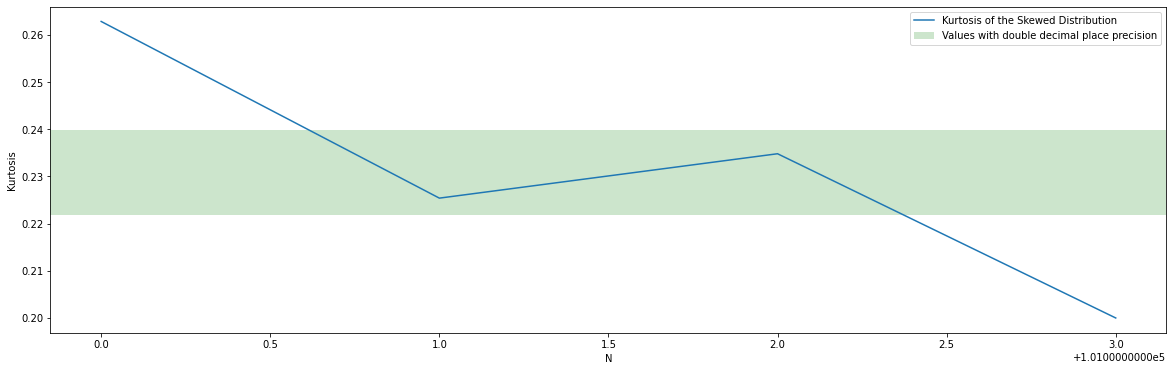

In [4]:
plt.plot(_N, _k, label = 'Kurtosis of the Skewed Distribution')
plt.axhspan(st.mean(_k) + 0.009,st.mean(_k) - 0.009, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
plt.legend()
plt.xlabel('N')
plt.ylabel('Kurtosis')

Text(0, 0.5, 'Skewness')

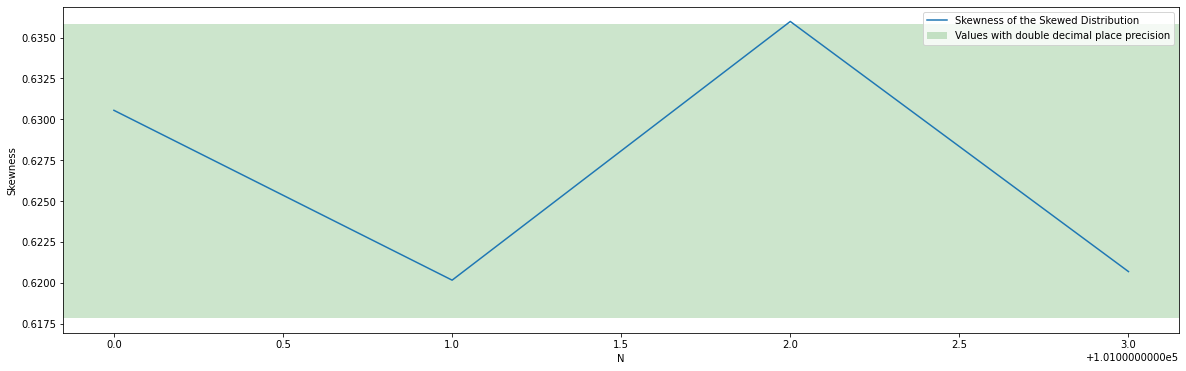

In [5]:
plt.plot(_N, _s, label = 'Skewness of the Skewed Distribution')
plt.axhspan(st.mean(_s) + 0.009,st.mean(_s) -0.009, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
plt.legend()
plt.xlabel('N')
plt.ylabel('Skewness')